**Luhang Sun & Roujia Zhong**

Fall 2020

CS343: Neural Networks

Project 1: Single-layer networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

## Goals

In this project, you will implement single-layer neural networks that includes the same fundamental components as larger multi-level networks.

**The goals are to:**

- Get familar with Jupyter notebooks, Numpy arrays, Pandas.
- Get familar with the workflow for preprocessing data, training a neural network, evaluating test data, and examining performance metrics.
- Analyze and visualize the decision boundaries formed by single-layer networks.
- Use a similar neural network architecture for classification and for regression.
- Work with multiple datasets.

### Reminders

- In this class, use `numpy ndarray` (`np.array()`), not Numpy Matrix.
- To help safeguard against data loss when working in a jupyter notebook, make sure the notebook is `Trusted` (Top right corner of notebook). This will ensure your work autosaves. **I still recommend manually saving at least every few minutes with (Control+S / Cmd+S)**

## Task 1: Implement the ADAptive LInear NEuron (ADALINE) network for binary classification

In Task 1, complete the methods of the `Adaline` class in `adaline.py`. This includes:

- `net_input(self, features)`
- `activation(self, net_in)`
- `compute_loss(self, errors)`
- `compute_accuracy(self, y, y_pred)`
- `gradient(self, errors, features)`

- `predict(self, features)`
- `fit(self, features, y, n_epochs, lr)`

**Important:** Before starting, read through the method descriptions and expected inputs/outputs. It probabily woud be a good idea to tackle simpler/smaller methods first, then use them in more complex ones. For example, it may be a good idea to work on `net_input` first because it is required to complete `fit`. There is test code below.

Here is a summary of the ADALINE network equations

##### Net input

$\vec{x}_i$ is one of the $N$ data sample vectors from the dataset matrix $A$. That is, `x_i.shape = (M,)`.

$$\text{netIn}_i = \sum_{j=1}^M x_{ij} w_j + b$$

##### Net activation

$$f(z_i) = z_i$$

##### Loss: Sum of squared error

$$L(\vec{w}) = \frac{1}{2} \sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )^2 $$

##### Gradient (bias)

$$\frac{\partial L}{\partial b} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )$$

##### Gradient (wts)

Below, $x_{ij}$ is the $j^{th}$ feature of the data sample vector $\vec{x}_i$.

$$\frac{\partial L}{\partial w_j} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right ) x_{ij}$$

##### Gradient descent (delta rule)

$$b(t+1) = b(t) - \eta \frac{\partial L}{\partial b}$$
$$w_j(t+1) = w_j(t) - \eta \frac{\partial L}{\partial w_j}$$

above $\eta$ is the learning rate, and $N$ is the training set (number of data samples in training epoch).

### 1a. Test your ADALINE implementation

In [3]:
net = Adaline()

#### Test `loss` function

In [4]:
np.random.seed(0)
randErrors = np.array([-0.835,  0.322, -0.381,  0.496, -0.89 , -0.953])
net_act = np.random.rand(len(randErrors))
debugLoss = net.compute_loss(randErrors, net_act)
print(f'Your loss is {debugLoss} and it should be 3.6609344768925496')

Your loss is 3.6609344768925496 and it should be 3.6609344768925496


#### Test `accuracy` function

In [5]:
randClasses1 = np.where(randErrors >= 0, 1, -1)
randClasses2 = np.roll(randClasses1, 1)
acc1 = net.compute_accuracy(randClasses1, randClasses1)
acc2 = net.compute_accuracy(randClasses1, randClasses2)
print(f'Test 1: Your accuracy is {acc1} and it should be 1.0')
print(f'Test 2: Your accuracy is {acc2} and it should be 0.33333333333333337')

Test 1: Your accuracy is 1.0 and it should be 1.0
Test 2: Your accuracy is 0.33333333333333337 and it should be 0.33333333333333337


#### Test `gradient` function

In [6]:
np.random.seed(0)
randFeatures = np.random.normal(loc=0, scale=1, size=(10,3))
randErrors1 = np.random.normal(loc=0, scale=1, size=(10,))
randBiasGrad, randWtGrad = net.gradient(randErrors1, randFeatures)
print(f'Test 1: Your bias gradient is {randBiasGrad} and it should be 0.7839944892482784')
print(f'Test 2: Your wt gradient is {randWtGrad} and it should be [ 0.4   -0.897  7.689]')

Test 1: Your bias gradient is 0.7839944892482784 and it should be 0.7839944892482784
Test 2: Your wt gradient is [ 0.4   -0.897  7.689] and it should be [ 0.4   -0.897  7.689]


#### Test `predict` function

In [7]:
np.random.seed(0)
inputs = np.random.randn(10, 5)
net.wts = np.random.randn(6)
y_pred = net.predict(inputs)
print(f'Your predicted classes are {y_pred}.\n            They should be [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]')

Your predicted classes are [-1 -1 -1 -1 -1 -1 -1 -1  1 -1].
            They should be [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]


#### Test `fit` function

In [8]:
np.random.seed(0)
net = Adaline()
inputs = np.random.randn(10, 5)
y = np.sign(np.random.randn(10))
loss, acc = net.fit(inputs, y)
print(f'Your end-of-training loss / accuracy are\n{loss[-1]} / {acc[-1]}.\nThey should be\n3.944874887550384 / 0.6')
print(f'Your wts after training are:\n{net.get_wts()}\nand should be\n[-0.298 -0.033  0.33  -0.382 -0.192  0.087]')

Your end-of-training loss / accuracy are
3.9448748875503834 / 0.6.
They should be
3.944874887550384 / 0.6
Your wts after training are:
[-0.298 -0.033  0.33  -0.382 -0.192  0.087]
and should be
[-0.298 -0.033  0.33  -0.382 -0.192  0.087]


### 1b. Load in and preprocess old faithful data

Write code to do the following in the below cell.

- Load in `old_faithful.csv`, represent data using a ndarray. Shape = [Num samps, Num features] = [272, 2].
- Assign the output classes (**severe**) to a separate 1D ndarray vector. Shape=(272,)
- Preprocess the data by normalizing by the global maximum. I.e. the max value over all features in the transformed dataset should be 1.0. Stated a different way, only one feature component of one data sample vector equals 1.0, everything else is smaller, but still $>=$ 0.
- Use matplotlib to create a scatter plot of the normalized data, color-coding data points according to their class
- I suggest using pandas, but you're welcome to do this however you like.
- **Make sure that executing the below cell results in an inline scatter plot, color-coded by class.**

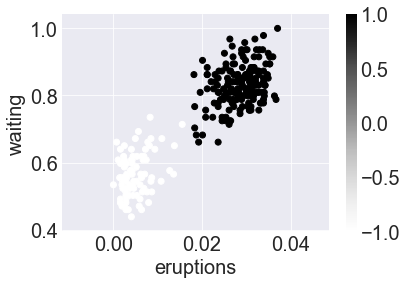

In [37]:
df = pd.read_csv("old_faithful.csv", header=0)
data = df.loc[:,["eruptions", "waiting"]].to_numpy()
output = df["severe"].to_numpy()
#preprocess the data
data_normalized = (data - data.min())/(data.max()-data.min())

#scatter using class labels
plt.scatter(data_normalized[:,0], data_normalized[:,1], c=output)
plt.colorbar()
plt.xlabel("eruptions")
plt.ylabel("waiting")
plt.show()

### 1c. Train ADALINE on normalized Old Faithful data using default hyperparameters (i.e. learning rate, epochs)

Print out the final loss and accuracy, then use the provided function to plot your training results inline in the below cell.

By the final epoch, training loss should reach ~23.74 and accuracy ~97%.

In [46]:
adaline = Adaline()
loss_hist, acc_hist = adaline.fit(data_normalized, output)
print(f'final loss history: {loss_hist[-1]}\nfinal accuracy history: {acc_hist[-1]}')

final loss history: 23.67742569218547
final accuracy history: 0.9742647058823529


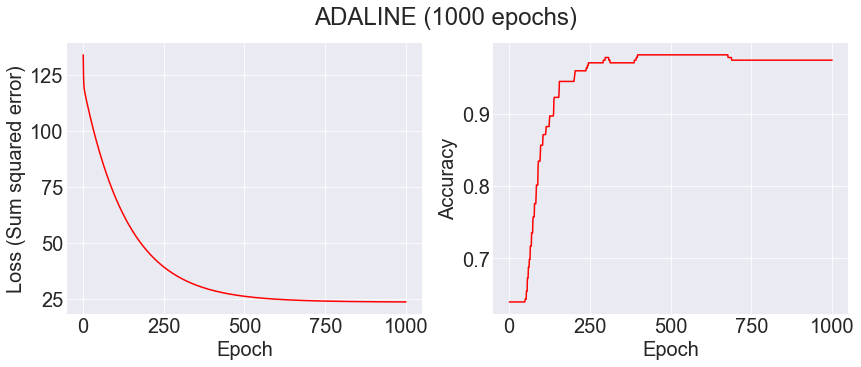

In [51]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()

plot_adaline_train(adaline, loss_hist, acc_hist)

#### Questions

**Question 1.** Based on your loss and accuracy curves, does it look like your network learned to classify the old faithful data? Why or why not?

#### Answers

1. Yes it did, because the loss declined and accuracy improved gradually in natural-log shape. 

### 1d. Early stopping

A common practice to speed up training is to stop training early (before the prescribed number of epochs is completed) if the loss stops changing (within some criterion level). You will modify the `fit` training function to implement this feature.

Add two optional parameters to `fit`:
- `early_stopping=False`
- `loss_tol=0.1`

In this subtask, implement the following:
- if `early_stopping` is True, terminate the training process if the difference in loss between the previous and current epoch is `< loss_tol`. This means that the loss has converged before the pre-specified number of training epochs.
- Set the number of training epochs to be large (2000). Determine the number of epochs required for the loss to converge.

In [62]:
net = Adaline()
loss, acc = net.fit_early_stopping(data_normalized, output, n_epochs=2000, early_stopping=True, loss_tol=0.1)
print(f"final loss: {loss[-1]}")

number of epochs: 268
final loss: 37.25553347430754


#### Questions

**Question 2.** How many epochs did it take to train the network with the early stopping tolerance of 0.1?

**Question 3.** At what approximate loss value does the network converge to when stopping early?

#### Answers

2. It took 268 epochs.
3. The final loss is 37.256

## Task 2: Feature scaling and convergence

**Important:** For this task, disable early stopping  in `fit`!

### 2a. Feature scaling

Copy your code from Task 1 to import the Old Faithful data, but this time don't normalize before training.

#### Questions

**Question 4.** What happens to the loss when we don't normalize the features before training? Why?

#### Answer

4.

### 2b. Test how individually standardizing your features affects the rate at which loss decreases over epochs

- Write code in the cell below to train the network on standardized features. Recall that standardizing a variable means applying the transformation $\frac{x - \mu}{\sigma}$. The mean and standard deviation should be computed over the entire dataset and separately per feature.
- Plot the loss and accuracy.

**The cell should generate an inline pair of plots when executed**.

#### Questions

**Question 5.** Explain the similarities/differences in loss and accuracy curves between these plots and those that you made in Task 1.

#### Answers

5. 

### 2c. Visualize class boundaries

For this subtask, you will plot the boundary between points (`eruptions`, `waiting` feature pairs) that get classified as severe (+1) or not (-1). To get there, fill in the blanks and answer the questions below.

In [ ]:
# Print your learned wts here


#### Questions

**Question 6.** What is the meaning of each of the above learned weights with respect to the variables/features in the dataset? Hint: Look at your `net_in` equation, look at the features that you feed into the model, look at the scatterplot you made in 1b, think about what features are present in a single training sample.

**Question 7.** Which feature / weight index corresponds to the "y axis value" in your scatterplot from 1b?

#### Answers

6. 
7. 

#### Transform weights for plotting

The class boundary equation is $0 = w_0 + w_1 \times x_i + w_2 \times y_i$ for sample $i$ in our data ($i$ goes to 272). But to plot it, we need an equation that looks like $y_i = m \times x_i + b$ where $m$ and $b$ are some combinations of our weights.

- Scale the weights so that the one corresponding to the "y value" is set to 1, then solve for $y$ (*It might be helpful to work this out by hand*). Once you do, adjust the sign/scale of your weights in code so they match up with the equation you wrote out by hand ( of form $y_i = m \times x_i + b$).
- Once you're done, have the cell below print your transformed weights.

- In the cell below, sample 50 equally spaced x values from -1.5 to 1.5 for plotting the class boundary. Given the `x_i` values, generate `y_i` values using the equation $y_i = m \times x_i + b$ (using your transformed weights from above). 

**Executing the code below should produce a graph that clearly shows this class boundary superimposed on your data scatter plot.**

## Task 3: Hyperparameters and grid search

This task focuses on the influence of learning rate (a model **hyperparameter**) on the quality of neural network training.

For this task, use the standardized Old Faithful features for input.

### 3a. Influence of learning rate on learning

In [ ]:
net = Adaline()
loss, acc = net.fit(x, y, lr=0.0001, n_epochs=10)
plot_adaline_train(net, loss, acc, plotMarkers=True)

#### Questions

**Question 8.** Make small changes to the learning rate hyperparameter above. How does it affect the loss?

**Question 9.** What happens if the learning rate is increased by several orders of magnitude? How does it affect the loss? Can you explain why?

#### Answers

8. 
9.

### 3b. Grid search

How can we determine a "good" value of the learning rate that doesn't result in pathological training behavior? Before, we were just guessing / eye-balling it. 

One common, simple approach is to perform a **grid search** through the parameter space. We select with a lower bound value for the parameter and walk through the parameter space in equal steps until we hit a upper bound value. After the search concludes, we set the parameter value for "real simulations" to the value that "worked best" according to some criteria we're interested in optimizing during the grid search.

#### Todo

Use grid search to find the highest learning rate that still lowers loss as a function of epoch (i.e. below this value, the loss decreases as a function of epoch, above this critical value, loss increases as a function of epoch). Find the value with precision of at least 1e-3 (10^-3). **Write all your code below and the learning rate that you find in the cell below** — do NOT modify the `Adaline` class.

**Tips:**
- Define lower and upper bound values for the parameter search, informed by your explorations in 3a.
- Define a step size at least as small as your starting value. Your simulation shouldn't last more a few seconds.
- Keep the number of epochs small (e.g. 10) to keep simulation time reasonable
- Remember that you are outputting the entire loss history when you execute `fit`.


#### Questions

**Question 10.** What is the critical learning rate value above which loss starts to increase?

#### Answers

10.